In [1]:
"""
Read all the smartwatch meal data 

"""
%load_ext autoreload
%autoreload 2
from ema import read

feasibility_df = read.smartwatch_feasibility()

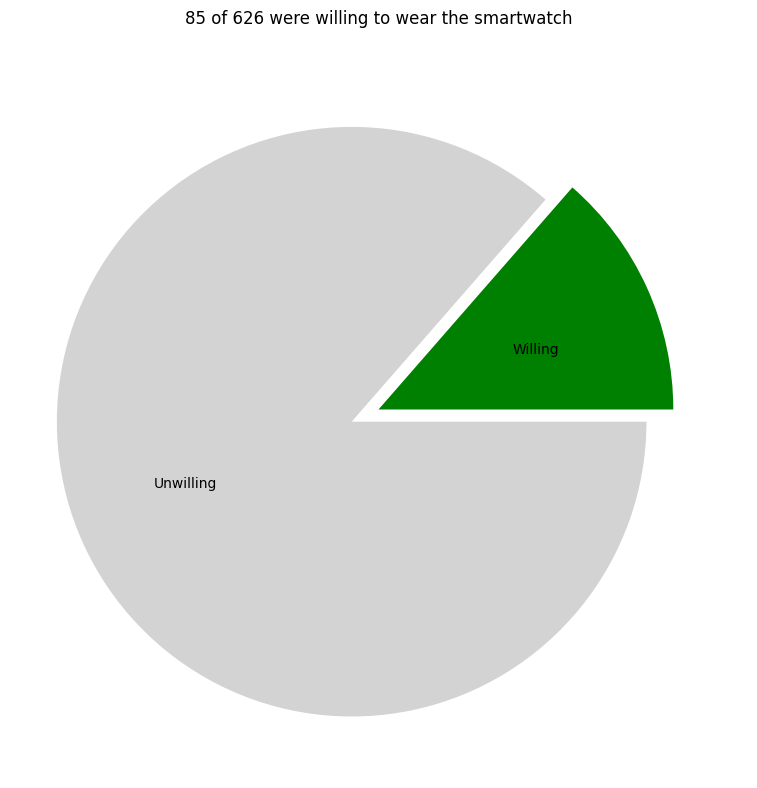

In [2]:
"""
Keep only the entries where participants were willing to wear the smartwatch

Plot a pie chart in the meantime

"""
import numpy as np
import matplotlib.pyplot as plt

accepted = feasibility_df["smartwatchwilling"] == 1
counts = [np.sum(accepted), len(accepted) - np.sum(accepted)]

# Guard against repeated running of this cell
assert counts[0] != len(
    accepted
), "All participants expected - has the df already been sliced?"

fig, axis = plt.subplots(figsize=(8, 8))
axis.pie(
    counts,
    explode=[0.0, 0.1],
    labels=["Willing", "Unwilling"],
    colors=["green", "lightgrey"],
    labeldistance=0.5,
)

fig.suptitle(
    f"{np.sum(accepted)} of {len(accepted)} were willing to wear the smartwatch"
)

fig.tight_layout()
fig.savefig("img/smartwatch_participation_pie.png")

# Slice the df
feasibility_df = feasibility_df[accepted]

In [3]:
"""
Add a new row translating the column headers into something more human readable

"""
import pandas as pd

if feasibility_df.columns.nlevels == 1:
    new_columns = list(feasibility_df)
    new_columns[4] = "Did your child participate in the smartwatch study?"
    new_columns[5] = "How many days in total did your child wear the smartwatch for?"
    new_columns[6] = "Did you participate in the smartwatch study?"
    new_columns[7] = "How many days in total did you wear the smarwatch for?"

    feasibility_df.columns = pd.MultiIndex.from_arrays(
        [new_columns, feasibility_df.columns], names=["readable", "default"]
    )

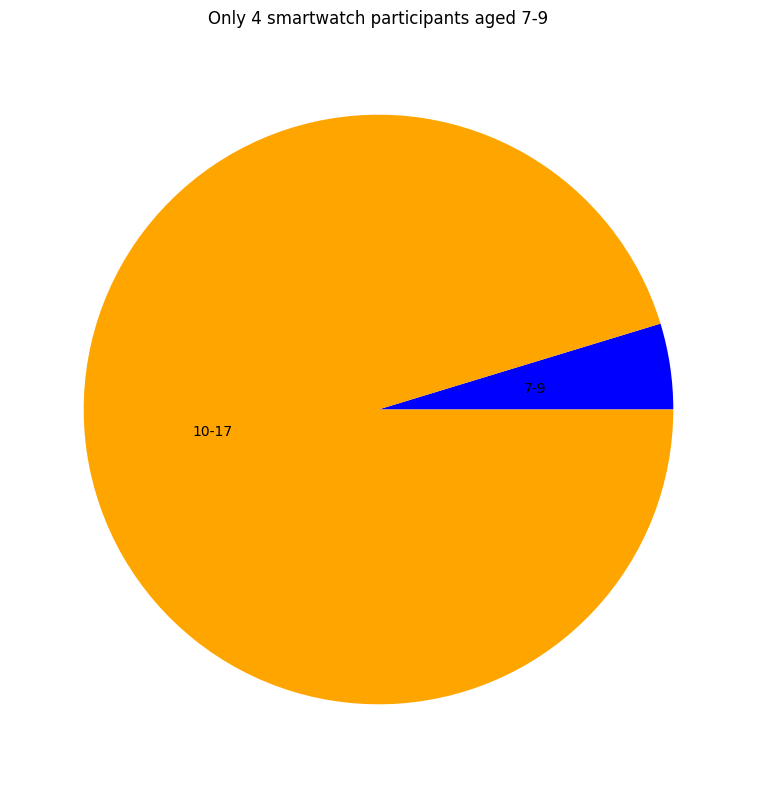

In [4]:
"""
Check that everyone answered one of the participation questions, but not both, then
see how many of each category we have

"""
is_young = (
    feasibility_df.xs("smart1_7to9", level="default", axis=1).notna().values.ravel()
)
is_old = (
    feasibility_df.xs("smart1_10to17", level="default", axis=1).notna().values.ravel()
)

# Check there's no overlap
assert True not in (is_young & is_old), np.unique(
    (is_young & is_old), return_counts=True
)

# Check there's no rows in neither
assert False not in (is_young | is_old), np.unique(
    (is_young | is_old), return_counts=True
)

fig, axis = plt.subplots(figsize=(8, 8))
axis.pie(
    [np.sum(is_young), np.sum(is_old)],
    labels=["7-9", "10-17"],
    colors=["blue", "orange"],
    labeldistance=0.5,
)

fig.suptitle(f"Only {np.sum(is_young)} smartwatch participants aged 7-9")

fig.tight_layout()
fig.savefig("img/smartwatch_age_pie.png")

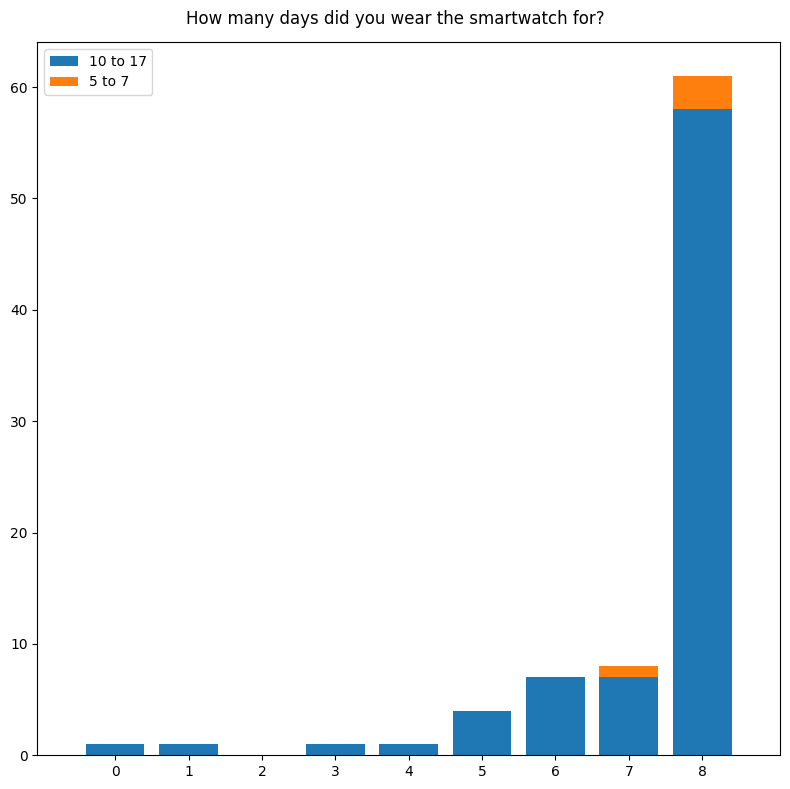

In [5]:
"""
Show how many days the participants wore the smartwatch for

"""
fig, axis = plt.subplots(figsize=(8, 8))

bins = np.linspace(-1, 8, 10) + 0.5
bins = np.sort(np.concatenate((bins - 0.1, bins + 0.1)))

hist_kw = {
    "histtype": "bar",
    "bins": bins,
    "stacked": True,
}

data = []
for mask, column in zip((is_old, is_young), ("smart5_10to17", "smart5_7to9")):
    data.append(feasibility_df[mask].xs(column, level="default", axis=1).values.ravel())

axis.hist(data, **hist_kw, label=("10 to 17", "5 to 7"))
axis.legend()
axis.set_xticks(np.arange(0, 9))

fig.suptitle("How many days did you wear the smartwatch for?")
fig.tight_layout()

fig.savefig("img/smartwatch_days_hist.png")

In [6]:
"""
There's a big database of survey answers somewhere

"""
qnaire_df = read.full_questionnaire()

In [7]:
"""
Slice it to only contain the smartwatch questions, and some other possibly relevant bits

"""
keep_cols = [
    "respondent_status",
    "age_dob",
]  # Extra columns to keep. NB keeps all columns containing these strings

# Keep the smartwatch columns and the extra columns
keep = qnaire_df.columns.str.startswith("smart") | qnaire_df.columns.str.contains(
    "|".join(keep_cols)
)

smartwatch_df = qnaire_df.loc[:, keep]

# Let's also only keep those who responded Agree to the status thing
smartwatch_df = smartwatch_df[smartwatch_df["respondent_status"] == 1]

smartwatch_df

,respondent_status,age_dob,smartwatchwilling,smart1_7to9,smart2_7to9,smart2_7to9_1,smart2_7to9_2,smart2_7to9_3,smart2_7to9_4,smart2_7to9_5,...,smart7_10to17,smart8_10to17,smartq9_note_10to17,smart_opt1_10to17,smart_opt2_10to17,smart_opt3_10to17,smart_opt4_10to17,smart10_10to17,smart11_10to17,respondent_statusdesc
4,1,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
5,1,17.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
6,1,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
7,1,17.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
16,1,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
1976,1,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
1977,1,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree
1978,1,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,,,Agree


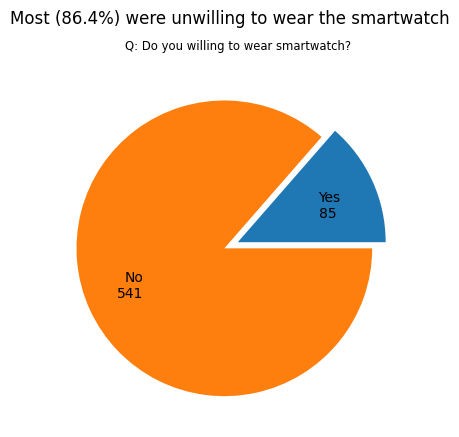

In [8]:
"""
Look at the spread of people who answered the smartwatch questions

"""
vals, counts = np.unique(smartwatch_df["smartwatchwilling"], return_counts=True)
fig, axis = plt.subplots()

axis.pie(
    counts,
    labels=[f"Yes\n{counts[0]}", f"No\n{counts[1]}"],
    labeldistance=0.6,
    explode=[0.0, 0.1],
)
fig.suptitle(
    f"Most ({100 * counts[1] / np.sum(counts):.1f}%) were unwilling to wear the smartwatch"
)
axis.set_title("Q: Do you willing to wear smartwatch?", fontsize="small")
fig.savefig("img/smartwatch_willing_pie.png")

None

In [ ]:
codebook = read.full_codebook()

/tmp/ipykernel_29626/509949560.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colours = cm.get_cmap("tab20").colors


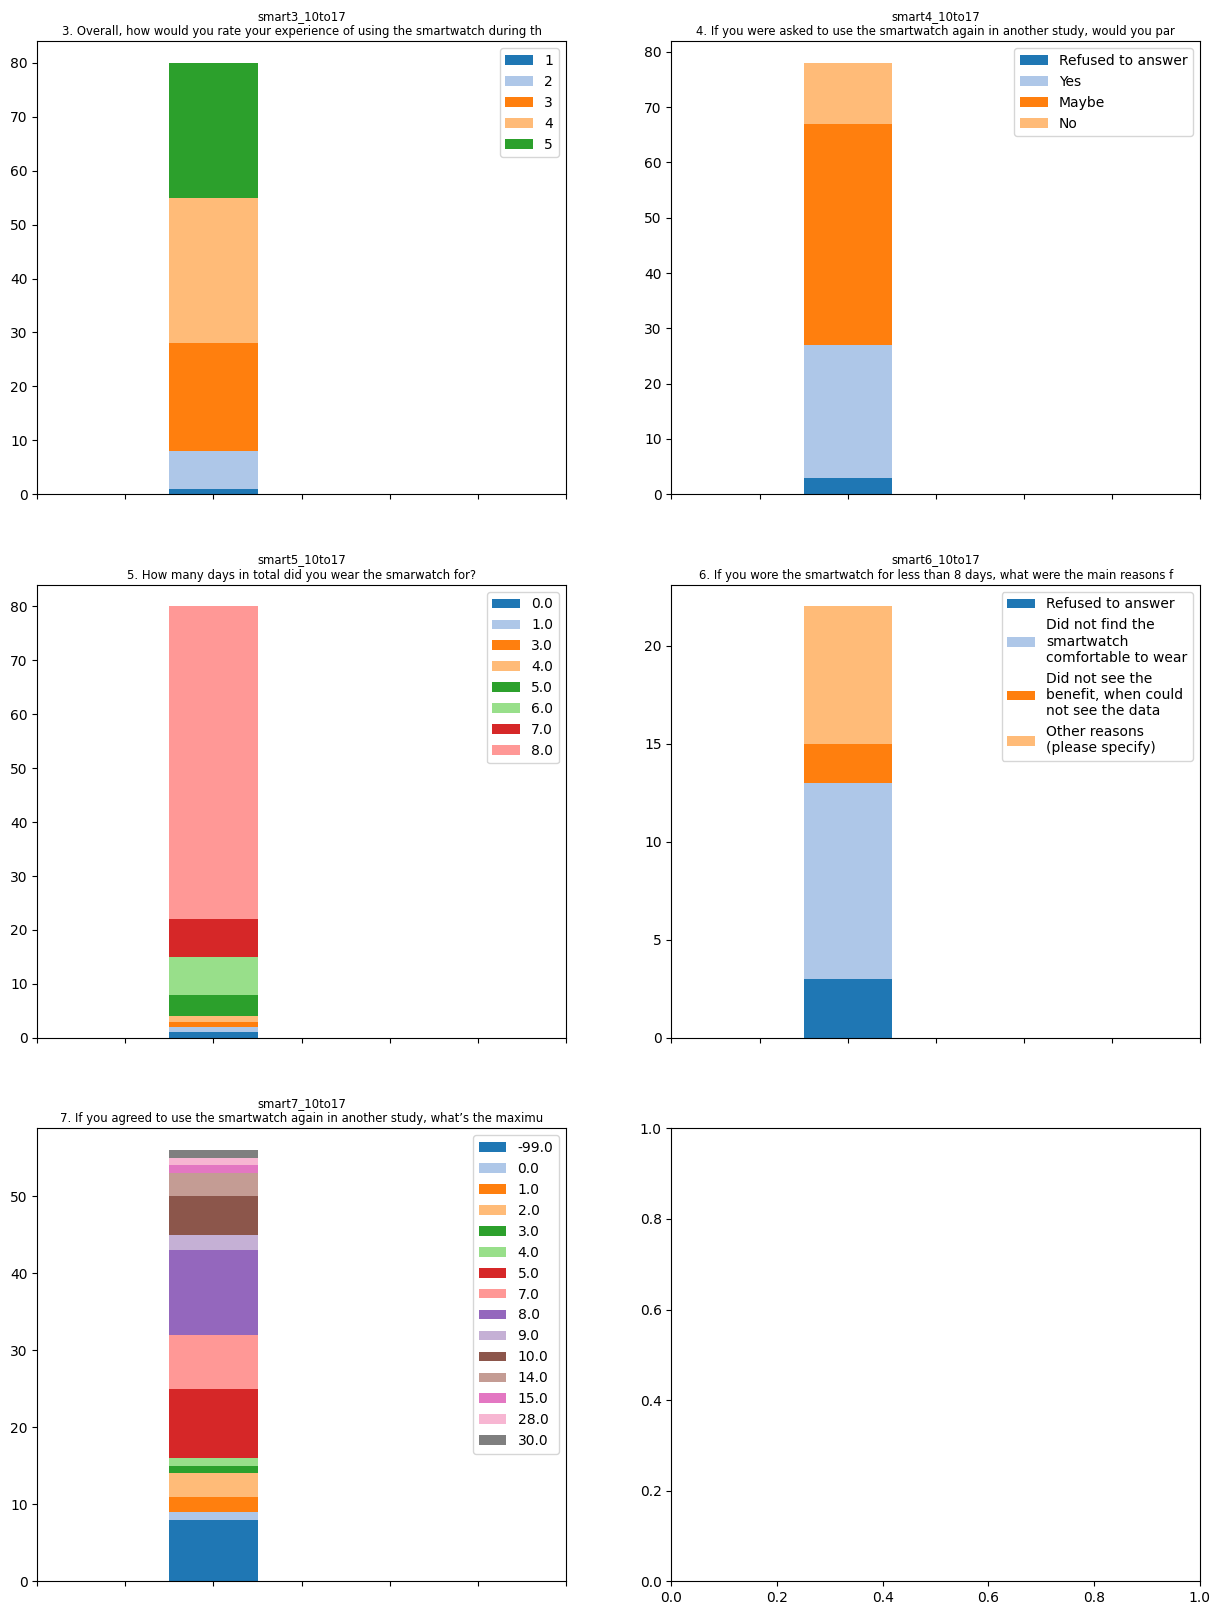

In [83]:
"""
Explore the reasons for not wearing the smartwatch, for those who were not willing

"""
from textwrap import wrap
from matplotlib import cm


def stacked_bar(question: str, axis: plt.Axes) -> None:
    # Find the responses to it
    d = dict(zip(*np.unique(smartwatch_df[question].dropna(), return_counts=True)))

    # Translate the question to something more human readable
    question_index = codebook[codebook["Variable Name"] == question].index[0]
    human_question = codebook.loc[question_index, "Variable Label"]

    # Open ended questions aren't followed by a load of NaN rows
    answer_label = codebook.iloc[question_index]["Answer Label"]
    if isinstance(answer_label, str) and answer_label.lower().strip() == "open ended":
        answer_dict = {k: k for k in d.keys()}

    else:
        answer_dict = {}
        for _, row in codebook.iloc[question_index + 1 :].iterrows():
            if not pd.isna(row["Variable Name"]):
                break

            answer_dict[row["Answer Code"]] = row["Answer Label"]

    # Plot as a stacked bar
    bottom = 0
    colours = cm.get_cmap("tab20").colors
    for (label, count), colour in zip(d.items(), colours):
        axis.bar(
            [0],
            count,
            0.5,
            label="\n".join(wrap(str(answer_dict[label]), 20)),
            bottom=bottom,
            color=colour,
        )
        bottom += count

    axis.set_xlim(-1, 2)
    axis.set_xticklabels([])

    axis.set_title(f"{question}\n{human_question}", fontsize="small", wrap=True)

    axis.legend()


# Choose a question
questions = [f"smart{i}_10to17" for i in range(3, 8)]
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

for question, axis in zip(questions, axes.ravel()):
    stacked_bar(question, axis)